In [2]:
# Cell 1 - imports & display settings
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="whitegrid")
DATA_DIR = "data"
os.makedirs(DATA_DIR, exist_ok=True)


In [7]:
# Cell 2 - column names and loading the Cleveland dataset
cols = [
    "age","sex","cp","trestbps","chol","fbs",
    "restecg","thalach","exang","oldpeak","slope",
    "ca","thal","target"
]

clev_path = os.path.join(DATA_DIR, "processed.cleveland.data")
df = pd.read_csv(clev_path, header=None, names=cols)
print("Loaded:", clev_path)


Loaded: data\processed.cleveland.data


In [8]:
# Cell 3 - replace '?' and coerce numeric types
df = df.replace("?", np.nan)
# convert all columns to numeric when possible
for c in cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

print("Shape after load:", df.shape)
df.head(8)


Shape after load: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


In [9]:
# Cell 4 - turn target into binary: 0 stays 0, 1-4 -> 1
df['target'] = (df['target'] > 0).astype(int)
df['target'].value_counts()


target
0    164
1    139
Name: count, dtype: int64

In [10]:
# Cell 5 - check for missing values & stats
print("Info:")
display(df.info())

missing = df.isna().sum().sort_values(ascending=False)
pct_missing = (df.isna().mean()*100).sort_values(ascending=False)
display(pd.concat([missing, pct_missing.rename('percent_missing')], axis=1))

display(df.describe().T)


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


None

,0,percent_missing
ca,4,1.320132
thal,2,0.660066
cp,0,0.000000
trestbps,0,0.000000
age,0,0.000000
sex,0,0.000000
fbs,0,0.000000
chol,0,0.000000
restecg,0,0.000000
thalach,0,0.000000


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [11]:
# Cell 6 - quick decision: how many rows have any missing?
n_missing_rows = df.isna().any(axis=1).sum()
print(f"Rows with at least one missing value: {n_missing_rows} / {len(df)}")

# Option A: drop rows with missing (ok if very few)
df_dropped = df.dropna().reset_index(drop=True)
print("After dropna shape:", df_dropped.shape)

# Option B: keep original and impute later (recommended for small number of missing)
# We'll save both versions for now:
df.to_csv(os.path.join(DATA_DIR, "heart_disease_cleveland_raw.csv"), index=False)
df_dropped.to_csv(os.path.join(DATA_DIR, "heart_disease_cleveland_dropna.csv"), index=False)
print("Saved raw and dropna CSVs to data/")


Rows with at least one missing value: 6 / 303
After dropna shape: (297, 14)
Saved raw and dropna CSVs to data/


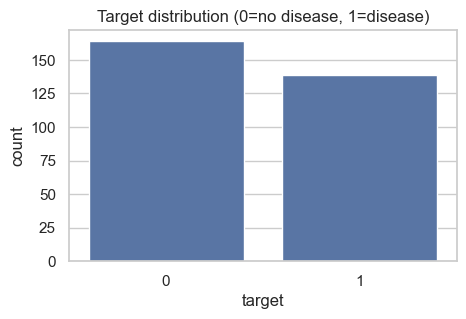

target
0    0.541254
1    0.458746
Name: proportion, dtype: float64


In [12]:
# Cell 7 - target distribution
plt.figure(figsize=(5,3))
sns.countplot(x='target', data=df)
plt.title('Target distribution (0=no disease, 1=disease)')
plt.show()

print(df['target'].value_counts(normalize=True).rename("proportion"))


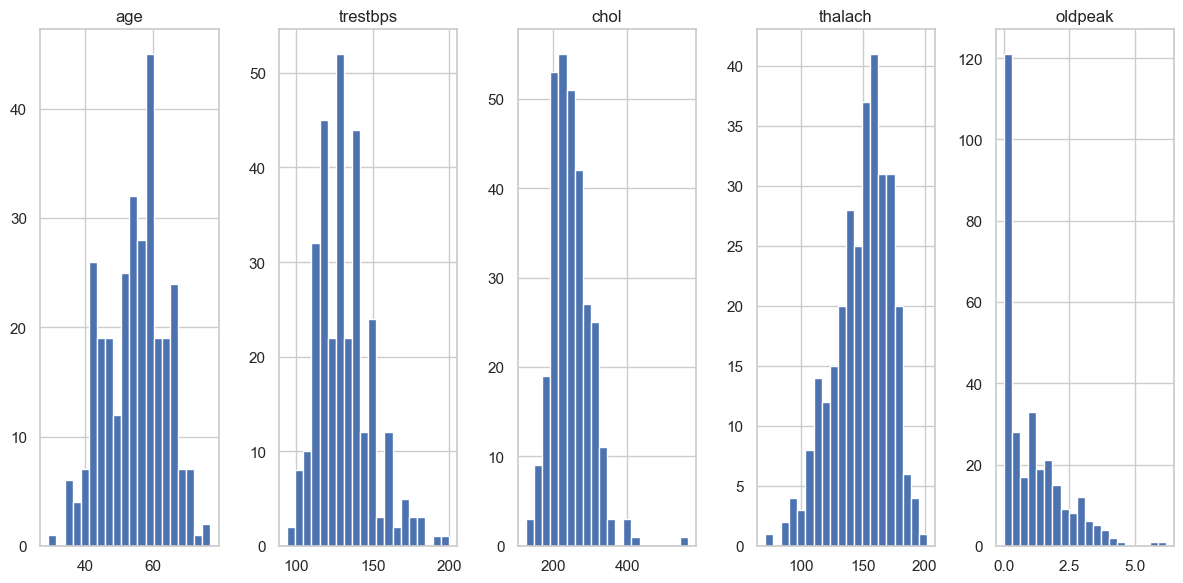

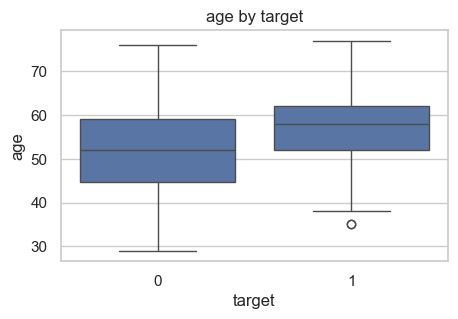

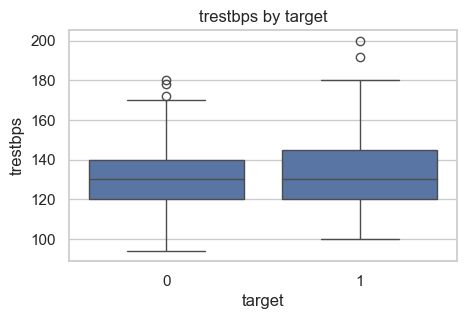

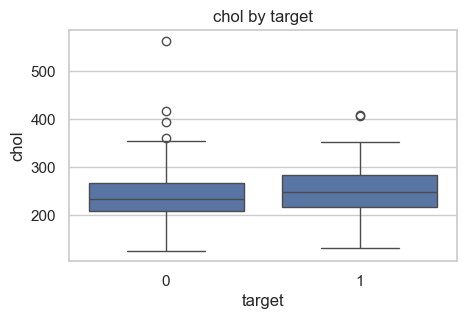

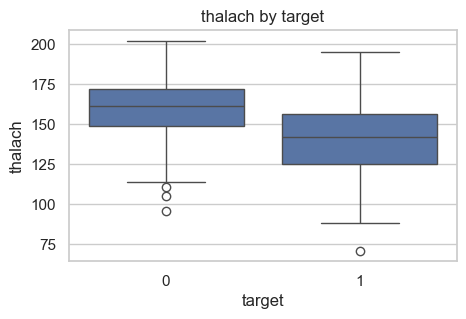

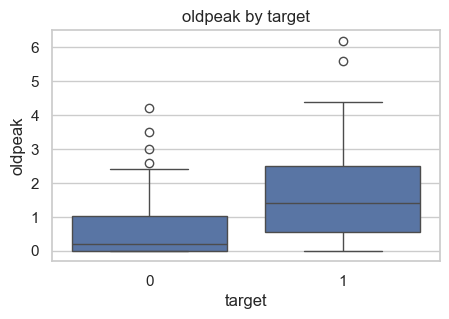

In [13]:
# Cell 8 - numeric histograms & boxplots
num_cols = ['age','trestbps','chol','thalach','oldpeak']
df[num_cols].hist(bins=20, figsize=(12,6), layout=(1,5))
plt.tight_layout()
plt.show()

# boxplots by target
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f"{col} by target")
    plt.show()


---- sex ----


sex
1.0    206
0.0     97
Name: count, dtype: int64

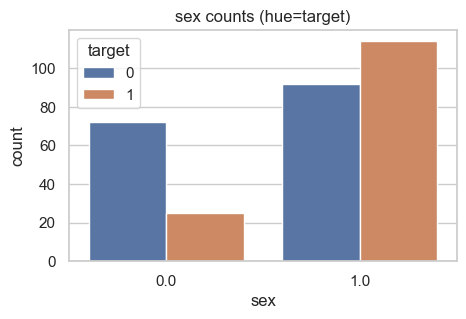

---- cp ----


cp
4.0    144
3.0     86
2.0     50
1.0     23
Name: count, dtype: int64

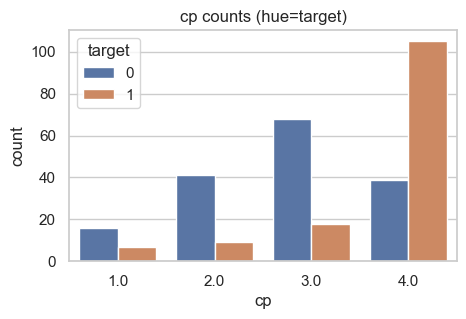

---- fbs ----


fbs
0.0    258
1.0     45
Name: count, dtype: int64

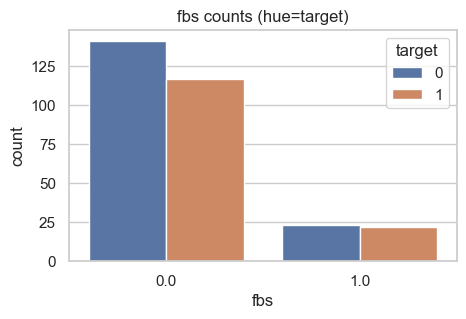

---- restecg ----


restecg
0.0    151
2.0    148
1.0      4
Name: count, dtype: int64

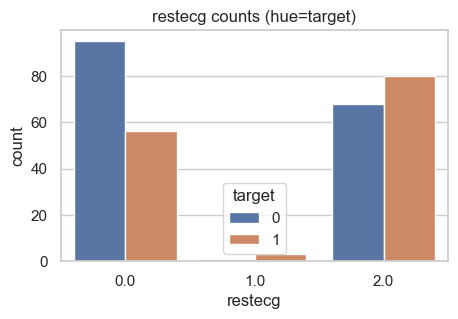

---- exang ----


exang
0.0    204
1.0     99
Name: count, dtype: int64

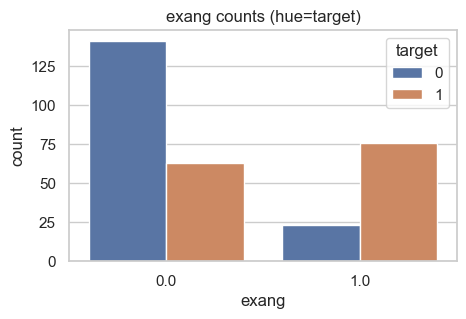

---- slope ----


slope
1.0    142
2.0    140
3.0     21
Name: count, dtype: int64

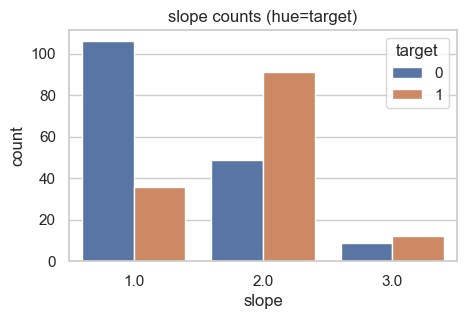

---- ca ----


ca
0.0    176
1.0     65
2.0     38
3.0     20
NaN      4
Name: count, dtype: int64

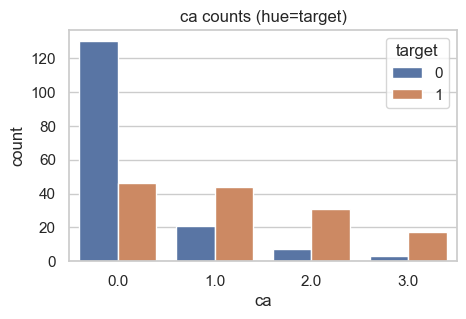

---- thal ----


thal
3.0    166
7.0    117
6.0     18
NaN      2
Name: count, dtype: int64

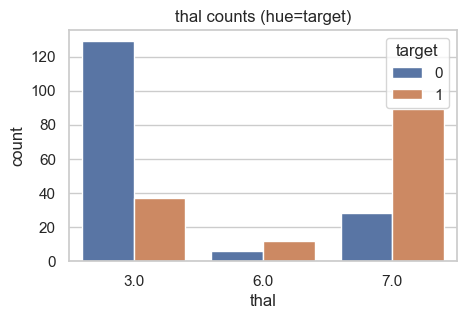

In [14]:
# Cell 9 - categorical features
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
for c in cat_cols:
    print("----", c, "----")
    display(df[c].value_counts(dropna=False))
    plt.figure(figsize=(5,3))
    sns.countplot(x=c, hue='target', data=df)
    plt.title(f"{c} counts (hue=target)")
    plt.show()


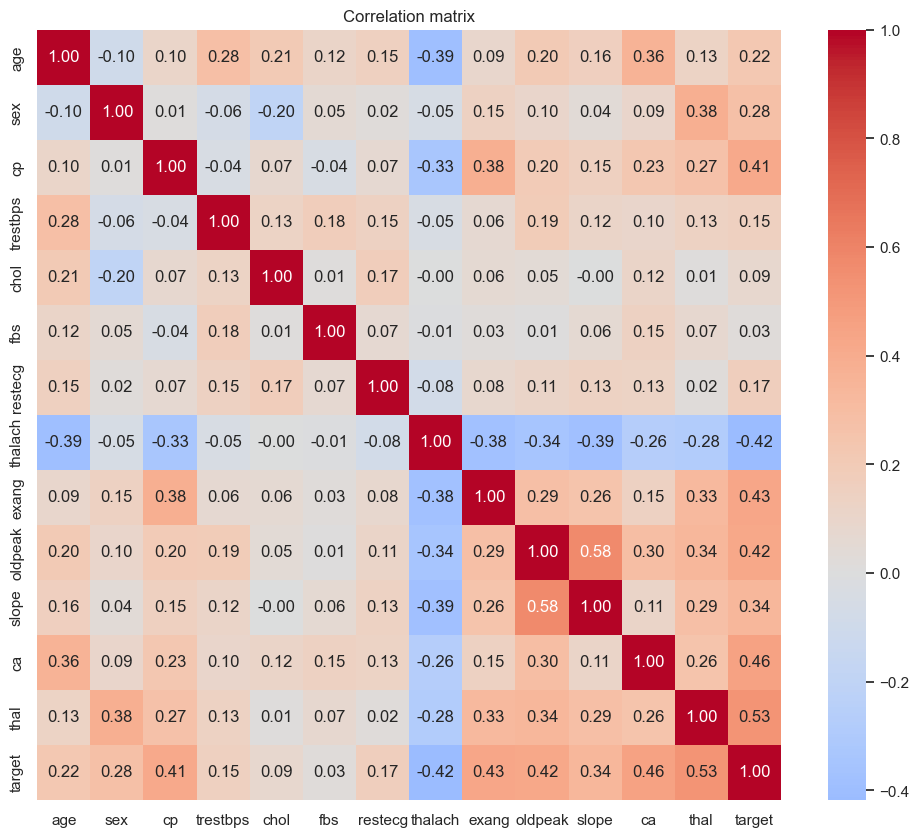

Correlation with target:


target      1.000000
thal        0.525689
ca          0.460442
exang       0.431894
oldpeak     0.424510
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
thalach    -0.417167
Name: target, dtype: float64

In [15]:
# Cell 10 - correlations
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation matrix')
plt.show()

print("Correlation with target:")
display(df.corr()['target'].sort_values(ascending=False))


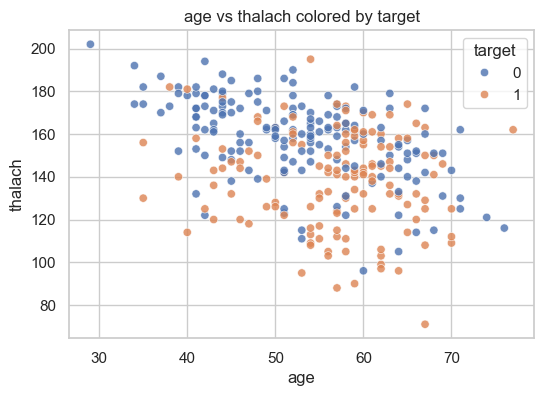

In [16]:
# Cell 11 - some scatter plots
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='thalach', hue='target', data=df, alpha=0.8)
plt.title('age vs thalach colored by target')
plt.show()


In [17]:
# Cell 12 - create final cleaned CSV for later steps (imputed or dropna version)
clean_path = os.path.join(DATA_DIR, "heart_disease_cleveland_clean.csv")
# choose df_dropped (dropna) or df (raw, with nans) depending on your decision:
df_dropped.to_csv(clean_path, index=False)
print("Saved cleaned CSV:", clean_path)


Saved cleaned CSV: data\heart_disease_cleveland_clean.csv


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [19]:
df = pd.read_csv("data/heart_disease_cleveland_clean.csv")

X = df.drop("target", axis=1)
y = df["target"]

print(X.shape, y.shape)


(297, 13) (297,)


In [20]:
NUM_FEATURES = ['age','trestbps','chol','thalach','oldpeak']
CAT_FEATURES = ['sex','cp','fbs','restecg','exang','slope','ca','thal']


In [21]:
# numeric: impute with median, then scale
num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# categorical: impute with most frequent, then one-hot encode
cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# combine
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, NUM_FEATURES),
        ('cat', cat_pipe, CAT_FEATURES)
    ])


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [23]:
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

print("Original shape:", X_train.shape)
print("Transformed shape:", X_train_trans.shape)


Original shape: (237, 13)
Transformed shape: (237, 28)


In [30]:
import os
import joblib
joblib.dump(preprocessor, r"C:\Users\moham\miniconda3\envs\heart_ml\models\final_pipeline.pkl")
print("Preprocessor saved to models/final_pipeline.pkl")


Preprocessor saved to models/final_pipeline.pkl
